## Simple returns and log returns

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(index=[2016, 2017, 2018], data = [100, 50, 95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [3]:
simplereturns = df.pct_change().dropna()
simplereturns

,Price
2017,-0.5
2018,0.9


In [4]:
simplereturns.mean()

Price    0.2
dtype: float64

### Mean returns are misleading as crazy

In [5]:
logreturns = np.log(df/df.shift(1)).dropna()
logreturns

,Price
2017,-0.693147
2018,0.641854


In [6]:
logreturns.mean()

Price   -0.025647
dtype: float64

In [7]:
100*np.exp(logreturns.mean()*2)

Price    95.0
dtype: float64

In [8]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [9]:
spy = SPY.Close
spy

Date
1993-01-29     43.937500
1993-02-01     44.250000
1993-02-02     44.343750
1993-02-03     44.812500
1993-02-04     45.000000
                 ...    
2023-02-21    399.089996
2023-02-22    398.540009
2023-02-23    400.660004
2023-02-24    396.380005
2023-02-27    397.730011
Name: Close, Length: 7574, dtype: float64

In [10]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-21,399.089996
2023-02-22,398.540009
2023-02-23,400.660004


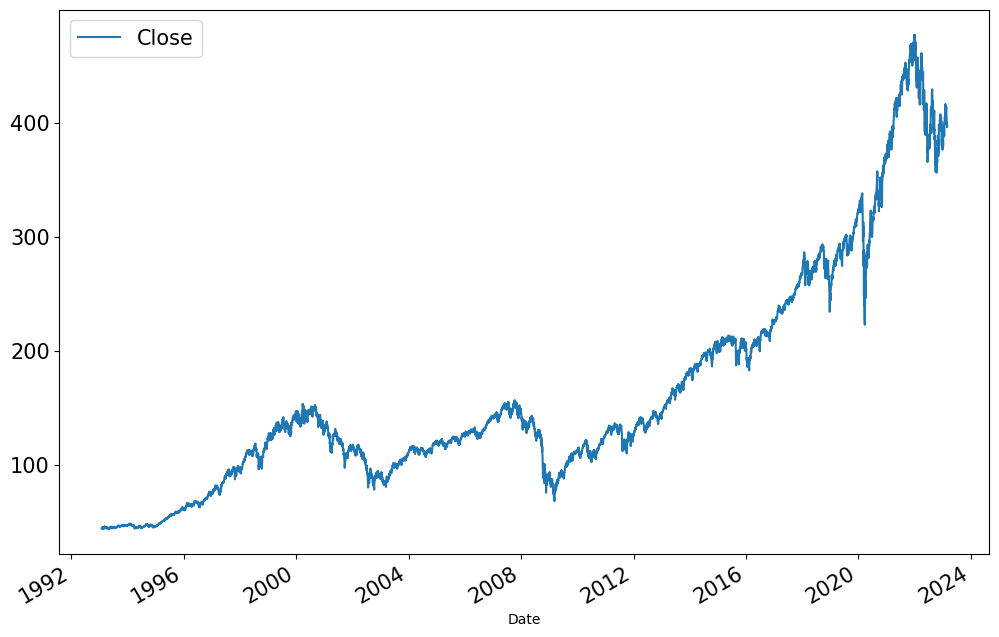

In [11]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [12]:
spy_roll = spy.rolling(window=10)
spy_roll

Rolling [window=10,center=False,axis=0,method=single]

In [13]:
spy_roll = spy_roll.mean()
spy_roll.head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [14]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-21,409.464996
2023-02-22,408.160004
2023-02-23,407.650009


In [15]:
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-21,415.190002
2023-02-22,413.980011
2023-02-23,413.980011


In [16]:
spy.rolling(window=10, min_periods=5).min().head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,43.93750
1993-02-05,43.93750
1993-02-08,43.93750
1993-02-09,43.93750
1993-02-10,43.93750


In [17]:
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-21,399.089996
2023-02-22,398.540009
2023-02-23,400.660004


In [18]:
spy["SMA50"] = spy.rolling(window=50,min_periods=50).mean()
spy

,Close,SMA50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2023-02-21,399.089996,396.7164
2023-02-22,398.540009,396.7624
2023-02-23,400.660004,396.9100


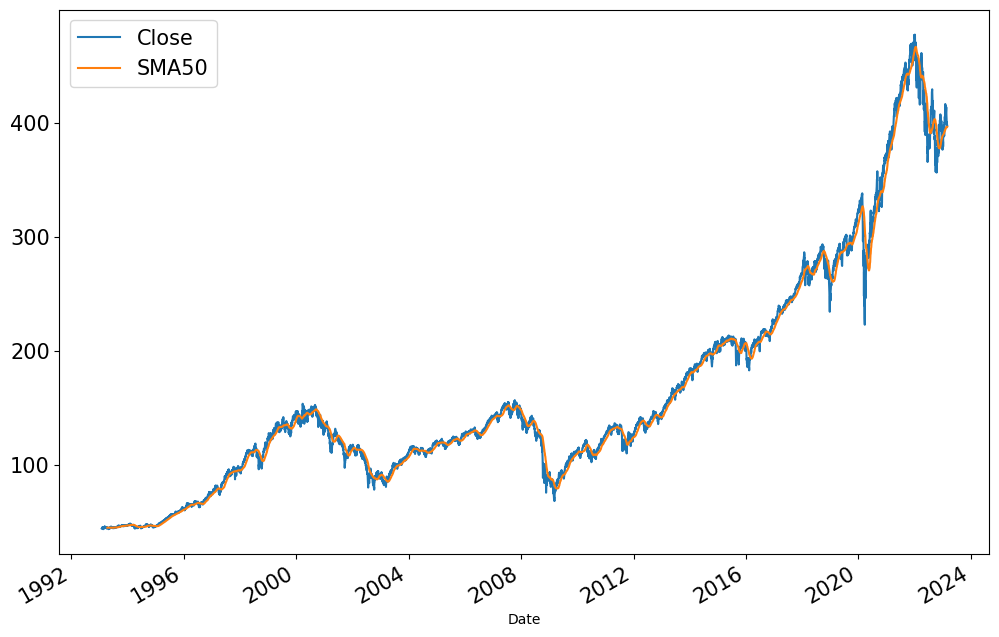

In [19]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [20]:
spy["SMA200"] = spy.Close.rolling(window=200,min_periods=200).mean()
spy

,Close,SMA50,SMA200
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2023-02-21,399.089996,396.7164,393.25910
2023-02-22,398.540009,396.7624,393.18275
2023-02-23,400.660004,396.9100,393.12935


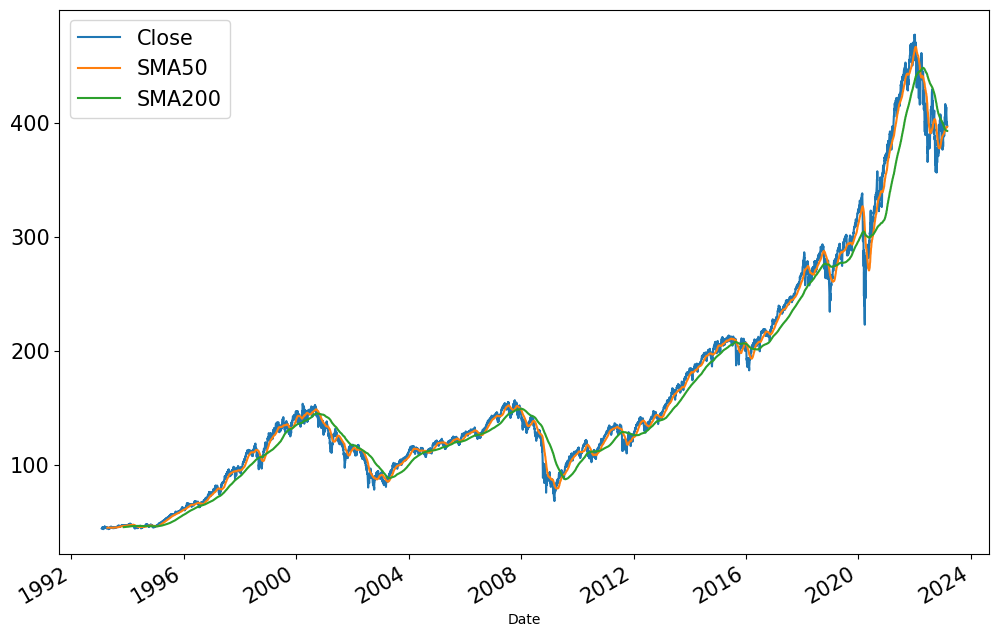

In [21]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

### Exponential moving average (EMA)

In [22]:
spy["EMA100"] = spy.Close.ewm(span=100, min_periods=100).mean()
spy

,Close,SMA50,SMA200,EMA100
Date,,,,
1993-01-29,43.937500,NaN,NaN,NaN
1993-02-01,44.250000,NaN,NaN,NaN
1993-02-02,44.343750,NaN,NaN,NaN
1993-02-03,44.812500,NaN,NaN,NaN
1993-02-04,45.000000,NaN,NaN,NaN
...,...,...,...,...
2023-02-21,399.089996,396.7164,393.25910,396.616963
2023-02-22,398.540009,396.7624,393.18275,396.655043
2023-02-23,400.660004,396.9100,393.12935,396.734349


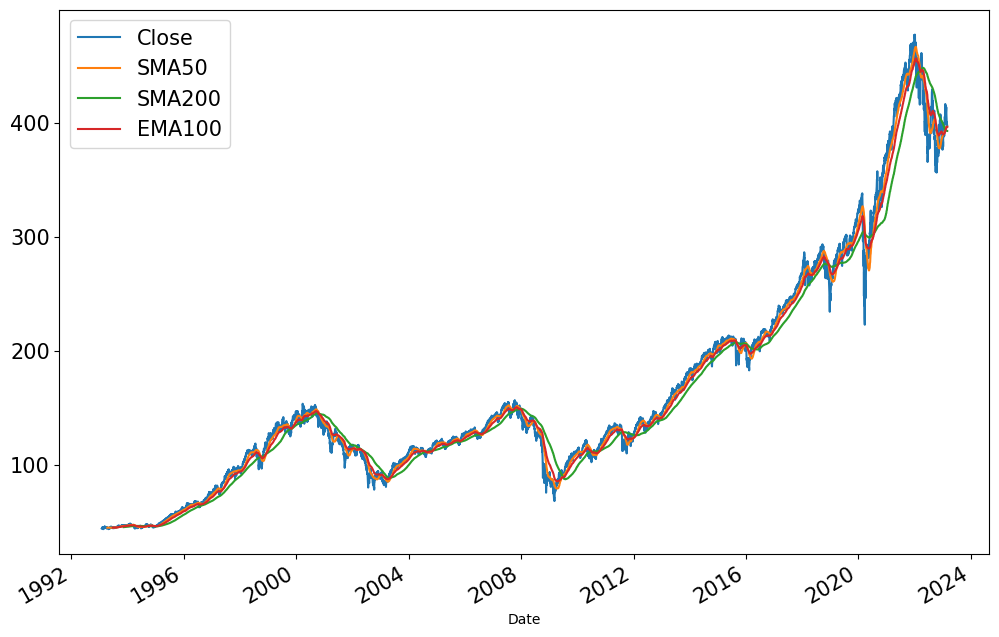

In [23]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [24]:
spy["Day"] = spy.index.day_name()
spy

,Close,SMA50,SMA200,EMA100,Day
Date,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday
1993-02-01,44.250000,NaN,NaN,NaN,Monday
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday
1993-02-04,45.000000,NaN,NaN,NaN,Thursday
...,...,...,...,...,...
2023-02-21,399.089996,396.7164,393.25910,396.616963,Tuesday
2023-02-22,398.540009,396.7624,393.18275,396.655043,Wednesday
2023-02-23,400.660004,396.9100,393.12935,396.734349,Thursday


In [25]:
spy["Quarter"] = spy.index.quarter
spy

,Close,SMA50,SMA200,EMA100,Day,Quarter
Date,,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2023-02-21,399.089996,396.7164,393.25910,396.616963,Tuesday,1
2023-02-22,398.540009,396.7624,393.18275,396.655043,Wednesday,1
2023-02-23,400.660004,396.9100,393.12935,396.734349,Thursday,1


In [29]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [33]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-21,399.089996
2023-02-22,398.540009
2023-02-23,400.660004


In [35]:
all_days = pd.date_range(start="2010-12-31", end="2020-01-01", freq = "D")
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [36]:
spy = spy.reindex(all_days)
spy

,Close
2010-12-31,125.750000
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,321.079987
2019-12-31,321.859985


In [37]:
spy.fillna(method="ffill")

,Close
2010-12-31,125.750000
2011-01-01,125.750000
2011-01-02,125.750000
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,322.859985
2019-12-29,322.859985
2019-12-30,321.079987
2019-12-31,321.859985


In [38]:
spy.fillna(method="bfill")

,Close
2010-12-31,125.750000
2011-01-01,127.050003
2011-01-02,127.050003
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,321.079987
2019-12-29,321.079987
2019-12-30,321.079987
2019-12-31,321.859985


In [40]:
SPY = yf.download("SPY", interval="1wk")
SPY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218218,1003200
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810118,2234800
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594891,1159800
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.002983,998700
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487267,1024300
...,...,...,...,...,...,...
2023-01-30,402.799988,418.309998,400.279999,412.350006,412.350006,458774900
2023-02-06,409.790009,416.489990,405.010010,408.040009,408.040009,376946400
2023-02-13,408.720001,415.049988,404.049988,407.260010,407.260010,380588700


### Cummaltive returns, Drawdowns etc.

In [43]:
apple = yf.download("AAPL")
apple = apple.Close.to_frame()
apple

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-02-21,148.479996
2023-02-22,148.910004
2023-02-23,149.399994
